                                                      ASSIGNMENT 2 - Spatial Filtering

AUC PERERA - D/ENG/21/0079/EE


Question 1

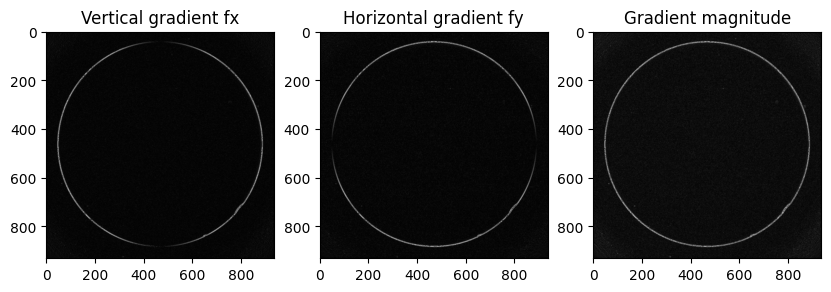

Center coordinates of the contact lens: ( 467 ,  463 )


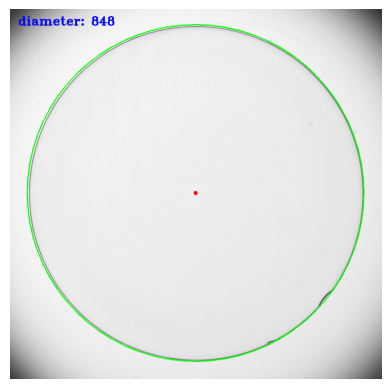

In [22]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#IMPORTING THE IMAGE
img = cv.imread('images/contact_lens.tif')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# gradient in the x-direction by using the sobel kernal
sobel_x = cv.Sobel(img_gray, cv.CV_64F, 1,0)
# gradient in the y-direction by using the sobel kernal 
sobel_y = cv.Sobel(img_gray, cv.CV_64F, 0,1) #cv.CV_64F specifies the data type of the output image, wgich is 64-bit floating-point
# computing the gradient magnitude
gradient_mag = cv.addWeighted(np.absolute(sobel_x), 1, np.absolute(sobel_y), 1, 0)

#ploting 
fig , ax = plt.subplots(1, 3, figsize=(10,5)) #creates a figure with one row and three columns of subplots
ax[0].imshow(np.absolute(sobel_x).astype('uint8'), cmap='gray')
ax[0].set_title("Vertical gradient fx")
ax[1].imshow(np.absolute(sobel_y).astype('uint8'), cmap='gray')
ax[1].set_title("Horizontal gradient fy")
ax[2].imshow(gradient_mag.astype('uint8'), cmap='gray')
ax[2].set_title("Gradient magnitude")
plt.show()

blur = cv.GaussianBlur(img_gray, (5,5), 0) # reducing noise by applying Gaussian blur
edges = cv.Canny(blur, 50, 150) # detecting the edges of the circular object by applying Canny edge detection 
y_coord , x_coord = np.where(edges !=0) # detecting the coordinates of the non-zero pixels in the edge image

# by calculating the mean of the pixel coordinates, we are able to find the center of the contact lens
center_x = int(np.mean(x_coord))
center_y = int(np.mean(y_coord))
print("Center coordinates of the contact lens:", "(",center_x, ", ", center_y, ")")

#calculating the Euclidean distance between the center point and each edge pixel 
distances = np.sqrt((x_coord - center_x)**2 + (y_coord - center_y)**2)
diameter = int(2*np.max(distances)) # finding the diameter of the contact lens
cv.circle(img, (center_x, center_y), 5, (0,0,255), -1) # drawing th center on the original image
cv.circle(img, (center_x, center_y), diameter // 2, (0,255,0), 2) # drawing the diameter on the original image
cv.putText(img, f"diameter: {diameter}", (20, 40), cv.FONT_HERSHEY_TRIPLEX, 1, (255,0,0), 2)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)) # final result 
plt.axis('off')
plt.show()




Quesstion 2 

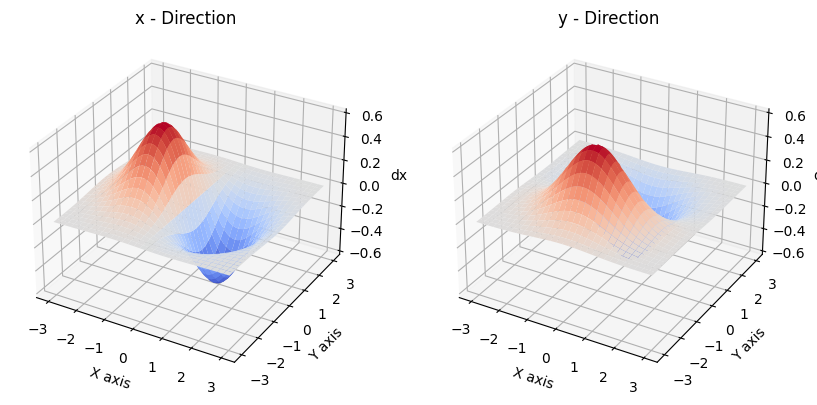

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# defining the domain
x = y = np.arange(-3, 3.1, 0.1)
X, Y = np.meshgrid(x,y) # takes the one-dimensional arrays x and y as input and generates two-dimensional arrays of their Cartesian products (X and Y)

# defining the sigma value
sigma = 1

dx = (-X / sigma ** 2) * np.exp(-(X ** 2 + Y ** 2) / (2 * sigma ** 2))
dy = (-Y / sigma ** 2) * np.exp(-(X ** 2 + Y ** 2) / (2 * sigma ** 2))
fig = plt.figure(figsize =(10,5))
# derivative of gaussian kernals with respect to X and Y 
ax = fig.add_subplot(1,2,1, projection='3d')
ax.plot_surface(X, Y, dx, cmap='coolwarm')
ax.set_title('x - Direction')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('dx')
ax = fig.add_subplot(1 ,2, 2, projection ='3d')
ax.plot_surface(X, Y, dy, cmap="coolwarm")
ax.set_title('y - Direction')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('dy')
plt.show()

Question 3

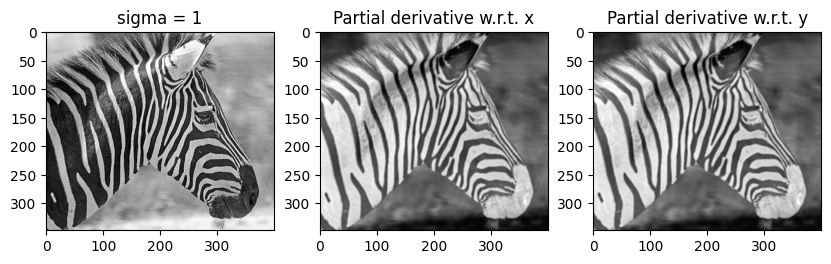

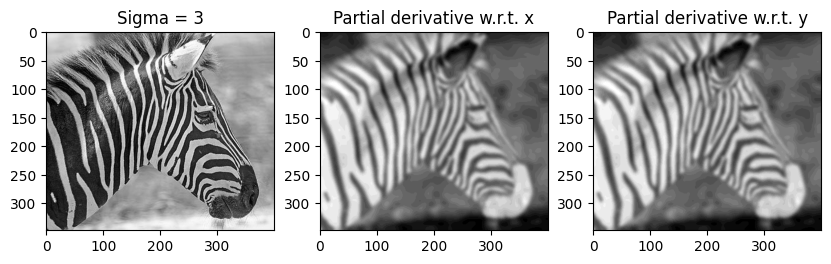

In [8]:
import numpy as np
import cv2 as cv
from scipy import ndimage
import matplotlib.pyplot as plt

img = cv.imread('images/zebrahead.jpg', cv.IMREAD_GRAYSCALE)

sigma = 1
#Gaussian kernel and its derivatives
kernel = np.zeros((5*sigma, 5*sigma))
for i in range(5*sigma):
    for j in range(5*sigma):
        x = i - 2*sigma
        y = j - 2*sigma
        kernel[i, j] = 1/(2*np.pi*sigma**2) * np.exp(-(x**2+y**2)/(2*sigma**2))
dKdx = ndimage.convolve(img, -kernel/sigma**2)
dKdy = ndimage.convolve(img, -kernel.T/sigma**2)

# Plot the results
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('sigma = 1')
axs[1].imshow(dKdx, cmap='gray')
axs[1].set_title('Partial derivative w.r.t. x')
axs[2].imshow(dKdy, cmap='gray')
axs[2].set_title('Partial derivative w.r.t. y')
plt.show()

sigma = 3

#Gaussian kernel and its derivatives
kernel = np.zeros((5*sigma, 5*sigma))
for i in range(5*sigma):
    for j in range(5*sigma):
        x = i - 2*sigma
        y = j - 2*sigma
        kernel[i, j] = 1/(2*np.pi*sigma**2) * np.exp(-(x**2+y**2)/(2*sigma**2))
dKdx = ndimage.convolve(img, -kernel/sigma**2)
dKdy = ndimage.convolve(img, -kernel.T/sigma**2)

# Plotting the results
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Sigma = 3')
axs[1].imshow(dKdx, cmap='gray')
axs[1].set_title('Partial derivative w.r.t. x')
axs[2].imshow(dKdy, cmap='gray')
axs[2].set_title('Partial derivative w.r.t. y')
plt.show()

Question 4

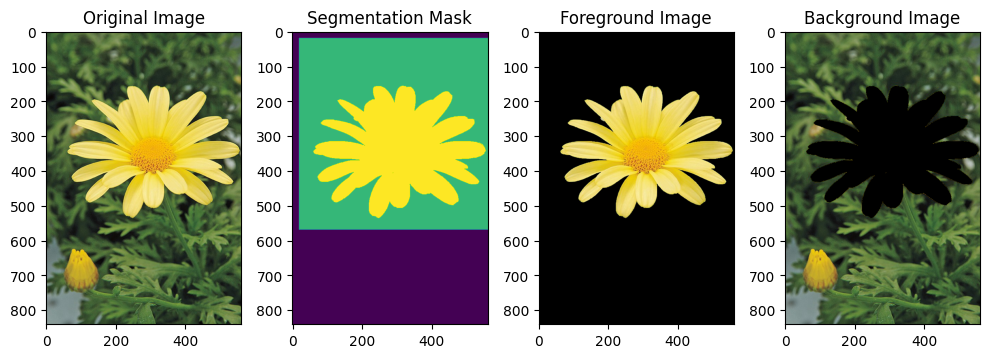

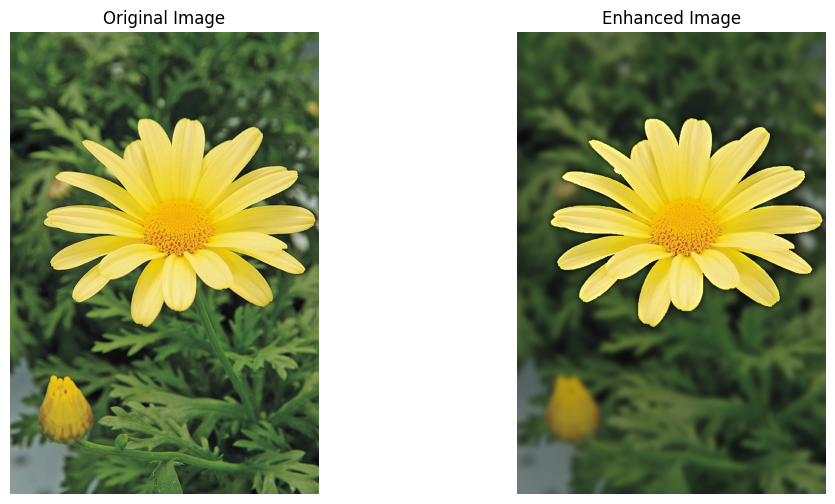

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# importing image
img = cv.imread('images/daisy.jpg')

# Creating a mask with same dimensions as image, and setting everything to background
mask = np.zeros(img.shape[:2], np.uint8)
background = np.zeros((1,65), np.float64)
# Defining the rectangle enclosing the flower
rect = (20, 20, 550, 550)
# Runing the grabCut algorithm
cv.grabCut(img, mask, rect, background, None, 5, cv.GC_INIT_WITH_RECT)
# Creating a new mask with the foreground pixels set to 1, and the background pixels set to 0
new_mask = np.where((mask == cv.GC_FGD) | (mask == cv.GC_PR_FGD), 1, 0).astype('uint8')
# Applying the mask to the original image to get the foreground and background images
foreground = cv.bitwise_and(img, img, mask=new_mask)
background = cv.bitwise_and(img, img, mask=1 - new_mask)

# Showing the final segmentation mask, foreground image, and background image
plt.figure(figsize=(10,10))
plt.subplot(141), plt.imshow(img[:,:,::-1]), plt.title('Original Image')
plt.subplot(142), plt.imshow(mask), plt.title('Segmentation Mask')
plt.subplot(143), plt.imshow(foreground[:,:,::-1]), plt.title('Foreground Image')
plt.subplot(144), plt.imshow(background[:,:,::-1]), plt.title('Background Image')
plt.tight_layout()
plt.show()

# Applying Gaussian blur to the background image
blurred_bg = cv.GaussianBlur(background, (31, 31), 0)
# Combining the foreground image and blurred background image
enhanced_img = cv.addWeighted(foreground, 1, blurred_bg, 0.8, 0)

# Displaying the original image and the enhanced image side by side
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.imshow(img[:,:,::-1])
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(enhanced_img[:,:,::-1])
plt.title('Enhanced Image')
plt.axis('off')

plt.show()

(-0.5, 1023.5, 651.5, -0.5)

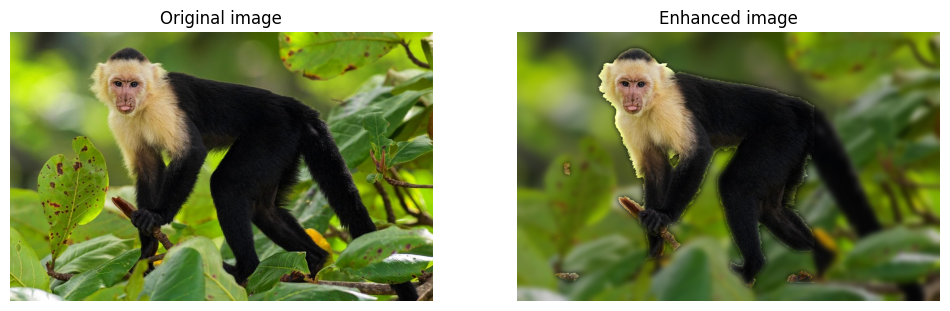

In [6]:

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('images/monkey.jpg')

mask = np.zeros(img.shape[:2], np.uint8)
background = np.zeros((1,65), np.float64)
rect = (20, 20, 700, 700)
cv.grabCut(img, mask, rect, background, None, 5, cv.GC_INIT_WITH_RECT)
new_mask = np.where((mask == cv.GC_FGD) | (mask == cv.GC_PR_FGD), 1, 0).astype('uint8')
foreground = cv.bitwise_and(img, img, mask=new_mask)
background = cv.bitwise_and(img, img, mask=1 - new_mask)
blurred_bg = cv.GaussianBlur(background, (41, 41), 0)
enhanced_img = cv.addWeighted(foreground, 1, blurred_bg, 0.8, 0)

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.imshow(img[:,:,::-1])
plt.title('Original image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(enhanced_img[:,:,::-1])
plt.title('Enhanced image')
plt.axis('off')
